# Building a Predictive Regression Model with Gradient Descent

## Project Documentation

### Overview
Implementation of Simple Linear Regression from scratch using Python to predict target values, evaluate model performance, and compare against scikit-learn’s regression model.
- Built all components of SLR manually without using machine learning libraries.
- Implemented gradient descent for parameter optimization.
- Split dataset into training and testing sets manually (80/20 split).
- Created custom functions for prediction, Mean Squared Error (MSE), and R² score.
- Visualized regression results using matplotlib.

### Results
- Achieved RMSE: 3882.71 and R²: 0.98 with manual implementation.
- Sklearn model on the same data produced RMSE: 5076.83 and R²: 0.94.
- Manual model outperformed sklearn due to better convergence with higher iteration cap.
- Demonstrated strong understanding of model training, gradient descent (parameter optimization), evaluation, error analysis without relying on external ML libraries.

### Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Defining core functions for performing Simple Linear Regression

#### Conversion Function: NumPy Arrays to Python Lists for compatibility with other functions.

In [2]:
def Convert(points):
    converted_points = points.tolist()
    
    return converted_points

#### Manual Train-Test Split Function: Default split 80/20.

In [3]:
def TrainTestSplit(x_points, y_points, train_size=0.8):
    if len(x_points) != len(y_points):
        raise ValueError("x and y must be of the same length")
    
    # Combine and shuffle
    combined = list(zip(x_points, y_points))
    random.shuffle(combined)
    
    # Unzip after shuffling
    x_points[:], y_points[:] = zip(*combined)
    
    # Compute split index
    split_index = int(len(x_points) * train_size)
    
    # Slice into train and test
    X_train = x_points[:split_index]
    y_train = y_points[:split_index]
    X_test = x_points[split_index:]
    y_test = y_points[split_index:]
    
    return X_train, X_test, y_train, y_test

#### Gradient Descent Function: Intercept and slope optimization using gradient descent for MSE minimization.

In [4]:
def GradientDescent(x_points,y_points):
    if len(x_points) != len(y_points):
        raise ValueError("number of x points must match the number of y points and vice versa")
    
    #defining intial variables
    intial_intercept_c = 0      #starting intercept, using a random value.
    intial_slope_m = 0          #starting slope, using a random value.
    n = len(x_points)
    learning_rate = 0.01
    step_size_intercept = float('inf')     #step size for adjusting the next value of the intercept.
    step_size_slope = float('inf')         #step size for adjusting the next value of the slope.
    iteration_limit = 0                    #counter to prevent infinite loop incase of slow convergence.

    while (abs(step_size_intercept) > 0.001 or abs(step_size_slope) > 0.001) and iteration_limit < 2000:
        
        #LOSS with respect to intercept (c)
        gradient_intercept = 0
        for x_point, y_point in zip(x_points, y_points):
            error = -2*(y_point - (intial_slope_m * x_point + intial_intercept_c))
            gradient_intercept += error
        gradient_intercept = gradient_intercept / n

        #calculating the next value of intercept 
        new_step = gradient_intercept * learning_rate
        new_intercept = intial_intercept_c - new_step
        step_size_intercept = new_step
        intial_intercept_c = new_intercept
    
        #LOSS with respect to slope (m)
        gradient_slope = 0
        for x_point, y_point in zip(x_points, y_points):
            error = -2 * x_point * (y_point - (intial_slope_m * x_point + intial_intercept_c))
            gradient_slope += error
        gradient_slope = gradient_slope / n

        #calculating the next value of slope
        new_step = gradient_slope * learning_rate
        new_slope = intial_slope_m - new_step
        step_size_slope = new_step
        intial_slope_m = new_slope

        iteration_limit += 1

    return intial_intercept_c, intial_slope_m

#### Prediction Function: Predicting output using trained parameters.

In [5]:
def Predict(x_points, intercept, slope):
    y_pred = []
    
    for x_point in x_points:
        predicted_value = slope * x_point + intercept
        y_pred.append(predicted_value)
    
    return y_pred

#### Loss Function: Mean Squared Error calculation (performance metric.

In [6]:
def MeanSquaredError(y_points, y_predictions):
    if len(y_points) != len(y_predictions):
        raise ValueError("number of predictions do not match the number of true values")
    
    MSE = 0
    n = len(y_points)

    for actual, prediction in zip(y_points, y_predictions):
        error = actual - prediction
        error = error ** 2
        MSE += error

    MSE = round(MSE / n,2)

    return round(MSE,3)

#### R2 Function: Calculating the Coefficient of Determination (R² Score)

In [7]:
def R2Score(y_points, y_predictions):
    if len(y_points) != len(y_predictions):
        raise ValueError("length of actual and predicted values must be equal")

    mean_y = sum(y_points) / len(y_points)
    ss_total = sum((y - mean_y) ** 2 for y in y_points)
    ss_residual = sum((y - y_hat) ** 2 for y, y_hat in zip(y_points, y_predictions))
    
    r2 = 1 - (ss_residual / ss_total)
    return round(r2,2)

#### Visualization Function: Scatter Plot with Fitted Regression Line.

In [8]:
def DisplayRegression(x_points, y_points, y_pred, rmse):
    plt.figure(figsize=(10,6))
    plt.scatter(x_points,y_points, label="True Data", color = 'green')
    plt.plot(x_points, y_pred, label="Regression Line", color='blue')
    plt.title(f"Root MSE: {rmse}")
    plt.grid(True)
    plt.legend()
    plt.show()

#### Visualization Function: Scatter Plot for X and Y.

In [9]:
def ScatterPlot(x_points, y_points):
    plt.figure(figsize=(10,6))
    plt.scatter(x_points,y_points, color = 'green')
    plt.title("Scatter Plot")
    plt.grid(True)
    plt.show()

### Complete Manual Implementation of SLR (Training to Evaluation)

In [10]:
df = pd.read_csv("Salary_Data.csv")

In [11]:
X = df['YearsExperience']
y = df['Salary']

In [12]:
X = Convert(X)
y = Convert(y)

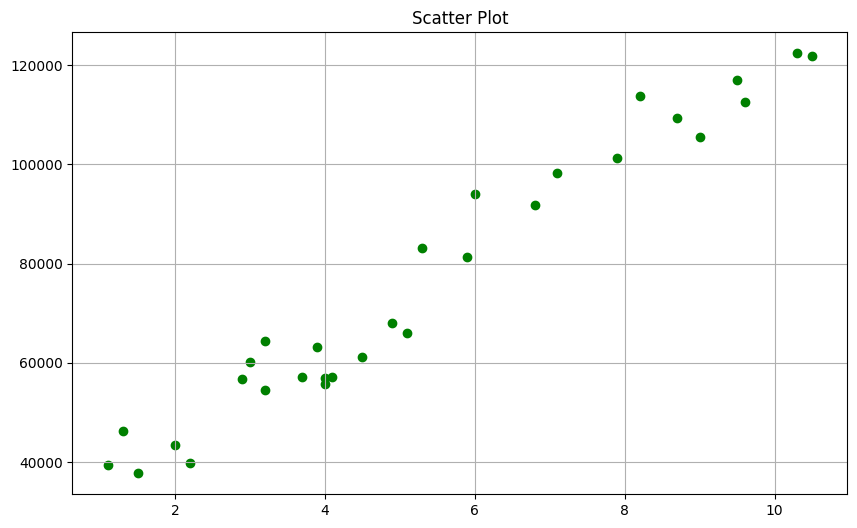

In [13]:
ScatterPlot(X,y)

#### Train-Test split

In [14]:
X_train, X_test, y_train, y_test = TrainTestSplit(X,y)

In [15]:
print(f"Training X data: {X_train}")

Training X data: [9.6, 5.3, 5.9, 2.2, 6.8, 7.1, 9.5, 4.9, 3.2, 6.0, 3.9, 1.5, 2.0, 8.2, 1.3, 4.5, 2.9, 5.1, 9.0, 4.1, 3.7, 4.0, 4.0, 3.2]


In [16]:
print(f"Training y data: {y_train}")

Training y data: [112635.0, 83088.0, 81363.0, 39891.0, 91738.0, 98273.0, 116969.0, 67938.0, 54445.0, 93940.0, 63218.0, 37731.0, 43525.0, 113812.0, 46205.0, 61111.0, 56642.0, 66029.0, 105582.0, 57081.0, 57189.0, 56957.0, 55794.0, 64445.0]


#### Gradient Descent Execution for Parameter Estimation (𝑚 and 𝑐) - Training Model

In [17]:
values = GradientDescent(X_train, y_train)
intercept = values[0]
slope = values[1]
print(f"Estimated Optimal Intercept: {intercept}")
print(f"Estimated Optimal Slope: {slope}")

Estimated Optimal Intercept: 24131.88980153865
Estimated Optimal Slope: 9723.361769147303


#### Computing Predictions with Learned Parameters - Testing Model

In [18]:
y_pred = Predict(X_test, intercept, slope)

#### Model Evaluation: Calculating Mean Squared Error and Visualizing Regression Line

In [19]:
MSE = MeanSquaredError(y_test, y_pred)

In [20]:
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 15075758.51


In [21]:
#root MSE for converting error into outcome variable's unit
RMSE = round(MSE ** 0.5,3)
print(f"Root MSE: ${RMSE}")

Root MSE: $3882.751


In [22]:
r2_score = R2Score(y_test, y_pred)
print(f"r2_score: {r2_score}")

r2_score: 0.98


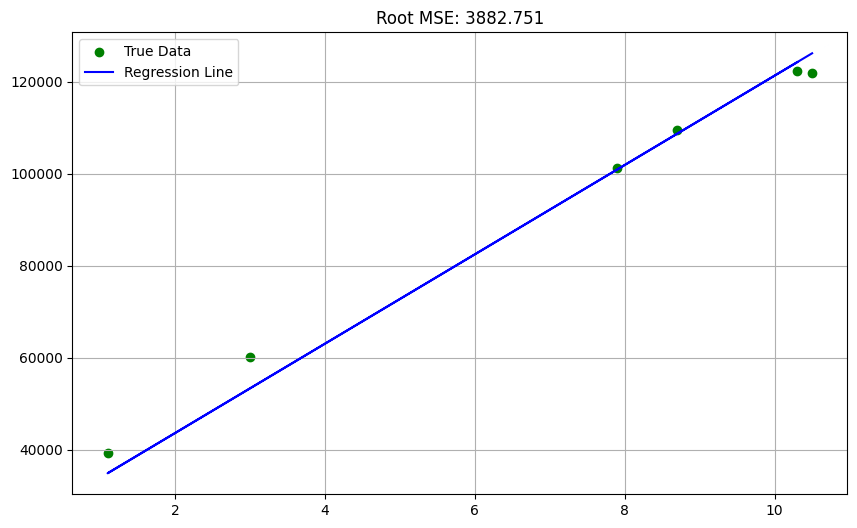

In [23]:
DisplayRegression(X_test, y_test, y_pred, RMSE)